# CREDIFIEL CODIGO BISONTE


In [14]:
import pandas as pd

In [3]:
#bancos_emisoras_costos= pd.read_excel("tabla_canales_envio.xlsx")
año_2022= pd.read_csv("2022.csv", dtype=str)
año_2023= pd.read_csv("2023.csv",dtype=str)
año_2024= pd.read_csv("2024.csv",dtype=str)
año_2025= pd.read_csv("2025.csv",dtype=str)


In [4]:
cobranza_creditos= pd.read_excel("cobranza_creditos.xlsb")

In [5]:
# Convierte la columna a formato datetime y luego aplica un formato personalizado
cobranza_creditos['FechaApertura'] = pd.to_datetime(cobranza_creditos['FechaApertura'], origin='1899-12-30', unit='D')
cobranza_creditos['FechaApertura_formato'] = cobranza_creditos['FechaApertura'].dt.strftime('%d/%m/%Y')

# Para mostrar ambos formatos
print(cobranza_creditos[['FechaApertura', 'FechaApertura_formato']])


      FechaApertura FechaApertura_formato
0        2024-02-12            12/02/2024
1        2023-11-30            30/11/2023
2        2025-03-07            07/03/2025
3        2024-11-29            29/11/2024
4        2023-02-27            27/02/2023
...             ...                   ...
15917    2022-01-13            13/01/2022
15918    2022-01-29            29/01/2022
15919    2022-01-10            10/01/2022
15920    2022-01-19            19/01/2022
15921    2022-01-10            10/01/2022

[15922 rows x 2 columns]


In [6]:
# Unir todos los años en un solo DataFrame
df_completo = pd.concat([año_2022, año_2023, año_2024, año_2025], ignore_index=True)


In [17]:
df_completo.head()

,idListaCobro,idCredito,consecutivoCobro,IdBanco.x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,IdRespuestaBanco,NomBanco,idEmisora,NomEmisora,Emisora,TipoEnvio,Descripcion,fechaCreacionLista,fechaEnvioCobro
0,100613,83021,27169966,2,572.24,572.24,0,NaN,04,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
1,100613,87227,27169937,2,517.74,517.74,0,NaN,04,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
2,100613,103785,27169946,2,681.23,681.23,0,NaN,04,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
3,100613,110463,27169969,2,572.24,572.24,0,NaN,04,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
4,100613,113755,27169948,2,340.62,340.62,0,NaN,04,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022


In [7]:
# Intentar convertir 'IdRespuestaBanco' a entero, reemplazando los errores por NaN
df_completo['IdRespuestaBanco'] = pd.to_numeric(df_completo['IdRespuestaBanco'], errors='coerce')

# Luego, si necesitas, puedes convertirlo a entero (si no tienes valores nulos)
df_completo['IdRespuestaBanco'] = df_completo['IdRespuestaBanco'].fillna(-1).astype(int)

df_completo

,idListaCobro,idCredito,consecutivoCobro,IdBanco.x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,IdRespuestaBanco,NomBanco,idEmisora,NomEmisora,Emisora,TipoEnvio,Descripcion,fechaCreacionLista,fechaEnvioCobro
0,100613,83021,27169966,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
1,100613,87227,27169937,2,517.74,517.74,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
2,100613,103785,27169946,2,681.23,681.23,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
3,100613,110463,27169969,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
4,100613,113755,27169948,2,340.62,340.62,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,30/09/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10057435,162271,741795,44299050,2,980.32,980.32,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,22/05/2025
10057436,162271,741795,44299051,2,1633.86,1633.86,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,22/05/2025
10057437,162271,742470,44299052,2,810.44,810.44,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,22/05/2025
10057438,162271,742470,44299053,2,1350.74,1350.74,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,22/05/2025


In [8]:
# Convertir la columna a datetime, especificando el formato
df_completo['fechaEnvioCobro'] = pd.to_datetime(df_completo['fechaEnvioCobro'], format='%d/%m/%Y')

# Extraer solo el año en una nueva columna
df_completo['año'] = df_completo['fechaEnvioCobro'].dt.year

df_completo.head()


,idListaCobro,idCredito,consecutivoCobro,IdBanco.x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,IdRespuestaBanco,NomBanco,idEmisora,NomEmisora,Emisora,TipoEnvio,Descripcion,fechaCreacionLista,fechaEnvioCobro,año
0,100613,83021,27169966,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
1,100613,87227,27169937,2,517.74,517.74,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
2,100613,103785,27169946,2,681.23,681.23,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
3,100613,110463,27169969,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
4,100613,113755,27169948,2,340.62,340.62,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022


In [20]:
resultado = df_completo.groupby('año').apply(
    lambda g: pd.Series({
        'intentos': len(g),
        'exitos': (g['IdRespuestaBanco'] == 0).sum(),
    })
).reset_index()

print(resultado)

    año  intentos  exitos
0  2022    361012   11763
1  2023   1681362   53500
2  2024   5900894  159088
3  2025   2114172   69552


C:\Users\david\AppData\Local\Temp\ipykernel_176328\2995646504.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultado = df_completo.groupby('año').apply(


In [13]:
df_completo

,idListaCobro,idCredito,consecutivoCobro,IdBanco.x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,IdRespuestaBanco,NomBanco,idEmisora,NomEmisora,Emisora,TipoEnvio,Descripcion,fechaCreacionLista,fechaEnvioCobro,año
0,100613,83021,27169966,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
1,100613,87227,27169937,2,517.74,517.74,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
2,100613,103785,27169946,2,681.23,681.23,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
3,100613,110463,27169969,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
4,100613,113755,27169948,2,340.62,340.62,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10057435,162271,741795,44299050,2,980.32,980.32,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025
10057436,162271,741795,44299051,2,1633.86,1633.86,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025
10057437,162271,742470,44299052,2,810.44,810.44,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025
10057438,162271,742470,44299053,2,1350.74,1350.74,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025


In [26]:
import pandas as pd

# Supongamos que df es tu DataFrame

resultado = df_completo.groupby('idCredito').apply(
    lambda g: pd.Series({
        'intentos': len(g),
        'exitos': (g['IdRespuestaBanco'] == 0).sum(),
    })
).reset_index()

# Ahora agregamos la columna con la división total / exitos
# Para evitar división entre cero, ponemos np.nan o un valor predeterminado

import numpy as np
resultado['ratio'] = resultado.apply(
    lambda row: row['intentos'] / row['exitos'] if row['exitos'] > 0 else np.nan,
    axis=1
)

print(resultado)


C:\Users\david\AppData\Local\Temp\ipykernel_122160\485894616.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  resultado = df_completo.groupby('idCredito').apply(


      idCredito  intentos  exitos  ratio
0         10073         1       0    NaN
1        101713         3       0    NaN
2        101797         2       0    NaN
3        101865        16       0    NaN
4        101903         1       0    NaN
...         ...       ...     ...    ...
97225     92127         1       0    NaN
97226     92725         3       0    NaN
97227     92845         2       0    NaN
97228     98256        32       0    NaN
97229      9872       671       0    NaN

[97230 rows x 4 columns]


In [24]:
resultado.to_csv('resultado.csv', index=False)

In [25]:
# Filtrar solo los registros exitosos (IdRespuestaBanco == "00")
df_exitos = df_completo[df_completo['IdRespuestaBanco'] == 0]

# Para cada idCredito, obtener la fila donde ocurre el primer éxito (mínima fecha)
primer_exito = df_exitos.loc[df_exitos.groupby('idCredito')['fechaEnvioCobro'].idxmin()]

# Ahora contamos cuántos créditos tuvieron su primer éxito en cada año
conteo_por_año = primer_exito.groupby('año')['idCredito'].nunique().reset_index()

conteo_por_año.rename(columns={'idCredito': 'cantidad_creditos_primer_exito'}, inplace=True)

print(conteo_por_año)


    año  cantidad_creditos_primer_exito
0  2022                            5984
1  2023                           13622
2  2024                           12287
3  2025                            8499


In [23]:
#Para cada crédito, obtener la fecha mínima (primer intento de cobranza)
primer_intento = df_completo.loc[df_completo.groupby('idCredito')['fechaEnvioCobro'].idxmin()]

# Extraer el año del primer intento
primer_intento['añoPrimerIntento'] = primer_intento['fechaEnvioCobro'].dt.year

# Contar cuántos créditos tuvieron su primer intento en cada año
conteo_por_año = primer_intento.groupby('añoPrimerIntento')['idCredito'].nunique().reset_index()

# Renombrar columnas para claridad
conteo_por_año.rename(columns={'idCredito': 'cantidad_creditos_primer_intento', 'añoPrimerIntento': 'año'}, inplace=True)

print(conteo_por_año)

    año  cantidad_creditos_primer_intento
0  2022                             50552
1  2023                             17691
2  2024                             16530
3  2025                             12457


In [50]:
len(resultado[resultado['exitos']>=2]['exitos'])

3606

In [29]:
canales_envio = pd.read_csv("tabla_canales_envio.csv", dtype=str)

In [14]:
canales_envio

,BANCO,EMISORA,SERVICIO,CANAL DE ENVÍ,TIPO ENVÍ,COBROS,HORARIO LIMITE CARGA INICIO,HORARIO LIMITE CARGA FIN,Tipo de tiempo,HORARIO DE COBRO EN BANCO POR DIA,OBSERVACIONES
0,BBVA MÉXIC,04750,TRADICIONAL,BANCA,CLABE,TOTAL Y PARCIAL,8:00,15:30,Hora,03:00,"Las respuestas se obtienen durante 6 días, al ..."
1,BBVA MÉXIC,04750,INTERBANCARIA,BANCA,CLABE,TOTAL Y PARCIAL,8:00,15:30,Intervalo,19:00 A 20:00,La respuesta se obtiene al siguiente dia en el...
2,BBVA MÉXIC,05923,PARCIAL,BANCA,"CLABE,CUENTA",TOTAL Y PARCIAL,8:00,15:30,Horas,19:15,"Las respuestas se obtienen durante 6 días, al ..."
3,BBVA MÉXIC,05503,MATUTINO,BANCA,"CLABE,CUENTA",TOTAL Y PARCIAL,8:00,15:30,Hora,3:30,"Las respuestas se obtienen durante 6 días, al ..."
4,BBVA MÉXIC,07456,EN LINEA,BANCA,"CLABE,CUENTA",TOTAL Y PARCIAL,6:00,20:15,Intervalo,6:00 A 20:15,La respuesta se obtiene 30 minutos despues de ...
5,BBVA MÉXIC,07167,TRADICIONAL,H2H,"CLABE,CUENTA",TOTAL Y PARCIAL,8:00,15:25,Hora,19:15,"Las respuestas se obtienen durante 6 días, al ..."
6,BBVA MÉXIC,07167,INTERBANCARIA,H2H,CLABE,TOTAL Y PARCIAL,8:00,15:25,Intervalo,19:00 A 20:00,La respuesta se obtiene al siguiente dia en el...
7,BBVA MÉXIC,06111,PARCIAL,H2H,"CLABE,CUENTA",TOTAL Y PARCIAL,8:00,15:25,Hora,19:15,"Las respuestas se obtienen durante 6 días, al ..."
8,BBVA MÉXIC,06114,MATUTINO,H2H,"CLABE,CUENTA",TOTAL Y PARCIAL,8:00,15:25,Hora,3:30,"Las respuestas se obtienen durante 6 días, al ..."
9,BBVA MÉXIC,07455,EN LINEA,H2H,"CLABE,CUENTA",TOTAL Y PARCIAL,6:00,20:00,Intervalo,6:00 A 20:15,La respuesta se obtiene 30 minutos despues de ...


In [27]:
# Primero obtener los idCredito que cumplen el filtro en resultado
#ids_filtrados = resultado[resultado['exitos'] >= 65]['idCredito']
ids_filtrados = resultado['idCredito']
# Filtrar df_completo usando .isin()
df_filtrado = df_completo[df_completo['idCredito'].isin(ids_filtrados)][
    ['idCredito', 'NomEmisora', 'Emisora', 'TipoEnvio', 'idEmisora', 'fechaEnvioCobro', 'IdRespuestaBanco']
]

print(df_filtrado)


         idCredito                                         NomEmisora  \
0            83021  Banamex Excepciones Cuenta                    ...   
1            87227  Banamex Excepciones Cuenta                    ...   
2           103785  Banamex Excepciones Cuenta                    ...   
3           110463  Banamex Excepciones Cuenta                    ...   
4           113755  Banamex Excepciones Cuenta                    ...   
...            ...                                                ...   
10057435    741795                      BANAMEX TRADICIONAL REINTENTO   
10057436    741795                      BANAMEX TRADICIONAL REINTENTO   
10057437    742470                      BANAMEX TRADICIONAL REINTENTO   
10057438    742470                      BANAMEX TRADICIONAL REINTENTO   
10057439    742470                      BANAMEX TRADICIONAL REINTENTO   

           Emisora    TipoEnvio idEmisora fechaEnvioCobro  IdRespuestaBanco  
0         noAplica       CUENTA        51    

In [58]:
df_filtrado['Emisora'].unique()

array(['noAplica', '06114', '06111', '00623', '07167', '07455', '00496',
       nan, 'REINTENTO', 'NoAplica', '00639'], dtype=object)

In [64]:
canales_envio['EMISORA'].unique()

array(['04750', '05923', '05503', '07456', '07167', '06111', '06114',
       '07455', '00639', '00496', nan, '00623', '20200'], dtype=object)

In [97]:
df_filtrado[((df_filtrado['Emisora'] == 'noAplica')|(df_filtrado['Emisora'] == 'REINTENTO')|(df_filtrado['Emisora'] == 'NoAplica')|(df_filtrado['Emisora'].isna()))&(df_filtrado['IdRespuestaBanco'] == '00')]['NomEmisora'].unique()

array(['Banamex Excepciones Tarjeta                       ',
       'Banamex Excepciones Cuenta                        ',
       'Banamex Reintentos                                '], dtype=object)

In [81]:
df_filtrado[df_filtrado['Emisora'].isna()]

,idCredito,NomEmisora,Emisora,TipoEnvio,idEmisora,fechaEnvioCobro,IdRespuestaBanco
210507,111636,NaN,NaN,NaN,65,2022-10-21,NaN
210512,140160,NaN,NaN,NaN,65,2022-10-21,NaN
210566,279409,NaN,NaN,NaN,65,2022-10-21,NaN
210568,281913,NaN,NaN,NaN,65,2022-10-21,NaN
210569,287668,NaN,NaN,NaN,65,2022-10-21,NaN
...,...,...,...,...,...,...,...
348574,579492,NaN,NaN,NaN,67,2022-10-25,NaN
348605,582139,NaN,NaN,NaN,67,2022-10-25,NaN
348620,583709,NaN,NaN,NaN,67,2022-10-25,NaN
348657,586404,NaN,NaN,NaN,67,2022-10-25,NaN


In [30]:
df_unido = df_filtrado.merge(
    canales_envio[['EMISORA', 'HORARIO DE COBRO EN BANCO POR DIA']],
    how='left',
    left_on='Emisora',
    right_on='EMISORA'
)

# Si quieres puedes eliminar la columna 'EMISORA' duplicada luego:
df_unido = df_unido.drop(columns=['EMISORA'])

print(df_unido.head())


  idCredito                                         NomEmisora   Emisora  \
0     83021  Banamex Excepciones Cuenta                    ...  noAplica   
1     87227  Banamex Excepciones Cuenta                    ...  noAplica   
2    103785  Banamex Excepciones Cuenta                    ...  noAplica   
3    110463  Banamex Excepciones Cuenta                    ...  noAplica   
4    113755  Banamex Excepciones Cuenta                    ...  noAplica   

  TipoEnvio idEmisora fechaEnvioCobro  IdRespuestaBanco  \
0    CUENTA        51      2022-09-30                 4   
1    CUENTA        51      2022-09-30                 4   
2    CUENTA        51      2022-09-30                 4   
3    CUENTA        51      2022-09-30                 4   
4    CUENTA        51      2022-09-30                 4   

  HORARIO DE COBRO EN BANCO POR DIA  
0                               NaN  
1                               NaN  
2                               NaN  
3                               NaN 

In [84]:
df_unido = df_unido[~df_unido['HORARIO DE COBRO EN BANCO POR DIA'].isna()].merge(
    resultado[['idCredito', 'intentos','exitos']],
    how='left',
    left_on='idCredito',
    right_on='idCredito'
)

print(df_unido.head())


  idCredito                                         NomEmisora Emisora  \
0    356270                               BBVA CUENTA MATUTINO   06114   
1    360299  Bancomer Parcial Cuenta Excepciones           ...   06111   
2    367703  Bancomer Parcial Cuenta Excepciones           ...   06111   
3    422210  Bancomer Parcial Cuenta Excepciones           ...   06111   
4    475597  Bancomer Parcial Cuenta Excepciones           ...   06111   

  TipoEnvio idEmisora fechaEnvioCobro  IdRespuestaBanco  \
0  MATUTINO        20      2022-10-07                -1   
1   PARCIAL        62      2022-09-28                 1   
2   PARCIAL        62      2022-09-28                 1   
3   PARCIAL        62      2022-09-28                 1   
4   PARCIAL        62      2022-09-28                 1   

  HORARIO DE COBRO EN BANCO POR DIA  intentos  exitos  
0                              3:30       213      68  
1                             19:15       792      91  
2                             19

In [31]:
df_unido

,idCredito,NomEmisora,Emisora,TipoEnvio,idEmisora,fechaEnvioCobro,IdRespuestaBanco,HORARIO DE COBRO EN BANCO POR DIA
0,83021,Banamex Excepciones Cuenta ...,noAplica,CUENTA,51,2022-09-30,4,NaN
1,87227,Banamex Excepciones Cuenta ...,noAplica,CUENTA,51,2022-09-30,4,NaN
2,103785,Banamex Excepciones Cuenta ...,noAplica,CUENTA,51,2022-09-30,4,NaN
3,110463,Banamex Excepciones Cuenta ...,noAplica,CUENTA,51,2022-09-30,4,NaN
4,113755,Banamex Excepciones Cuenta ...,noAplica,CUENTA,51,2022-09-30,4,NaN
...,...,...,...,...,...,...,...,...
11681547,741795,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,5,2025-05-22,4,NaN
11681548,741795,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,5,2025-05-22,4,NaN
11681549,742470,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,5,2025-05-22,4,NaN
11681550,742470,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,5,2025-05-22,4,NaN


In [33]:
# Filtramos solo los valores 0 y 4 en IdRespuestaBanco
df_filtrado = df_unido[df_unido['IdRespuestaBanco'].isin([0, 4])]

# Contamos cuántas veces aparece cada valor 0 y 4 por grupo
conteo = df_filtrado.groupby(['HORARIO DE COBRO EN BANCO POR DIA', 'IdRespuestaBanco']).size().unstack(fill_value=0)

# Para renombrar columnas y facilitar lectura (opcional)
conteo = conteo.rename(columns={0: 'Cantidad_0', 4: 'Cantidad_4'})

print(conteo)


IdRespuestaBanco                    Cantidad_0  Cantidad_4
HORARIO DE COBRO EN BANCO POR DIA                         
07:00,9:00,10:00,13:00,15:00,18:00       71553      396584
19:00 A 20:00                           148654      706285
19:00 a 20:00                            19553      167038
19:15                                    83327      388273
3:00 A 17:30                               860       40182
3:30                                      3286       54320
6:00 A 20:15                             34297     1375258
6:00, 12:00, 18:00, 22:00                19553      167038
6:00,12:00,18:00,22:00                   19553      167038


In [55]:
# Asegurarte que 'fechaEnvioCobro' es datetime
df_unido['fechaEnvioCobro'] = pd.to_datetime(df_unido['fechaEnvioCobro'])

# Crear columnas auxiliares para mes y día
df_unido['mes'] = df_unido['fechaEnvioCobro'].dt.month
df_unido['dia'] = df_unido['fechaEnvioCobro'].dt.day

# Agrupar por mes y día, luego contar '00' y '04' en 'IdRespuestaBanco'
conteo_mes_dia = df_unido.groupby(['mes', 'dia'])['IdRespuestaBanco'].value_counts().unstack(fill_value=0)

# Si quieres solo las columnas '00' y '04'
conteo_mes_dia = conteo_mes_dia.reindex(columns=[0, 4], fill_value=0)

print(conteo_mes_dia)


IdRespuestaBanco     0     4
mes dia                     
1   2              132  1022
    3              311  1570
    4              146  1645
    5              454   436
    6              113    84
...                ...   ...
12  27            1159  8682
    28              99  4549
    29              57  4822
    30              50  3283
    31             343  4417

[343 rows x 2 columns]


In [34]:
conteo_mes_dia.reset_index().to_csv('conteo_mes_dia.csv', index=False)

NameError: name 'conteo_mes_dia' is not defined

In [35]:
# Asegurarnos que fechaEnvioCobro sea datetime
df_unido['fechaEnvioCobro'] = pd.to_datetime(df_unido['fechaEnvioCobro'])

# Filtrar solo filas con éxito
df_exitos = df_unido[df_unido['IdRespuestaBanco'] == 0].copy()

# Ordenar por idCredito y fecha
df_exitos = df_exitos.sort_values(['idCredito', 'fechaEnvioCobro'])

# Agrupar por idCredito y calcular la diferencia de días entre fechas consecutivas
df_exitos['dias_entre_pagos'] = df_exitos.groupby('idCredito')['fechaEnvioCobro'].diff().dt.days

estadisticas = df_exitos.groupby('idCredito')['dias_entre_pagos'].agg(['mean', 'var']).reset_index()

estadisticas.rename(columns={'mean': 'promedio_dias_entre_pagos', 'var': 'varianza_dias_entre_pagos'}, inplace=True)


In [58]:
estadisticas

,idCredito,promedio_dias_entre_pagos,varianza_dias_entre_pagos
0,110593,15.980000,1733.366939
1,111844,3.975904,48.072583
2,113252,5.000000,44.250000
3,114525,30.388889,2930.369281
4,116232,6.705882,191.470588
...,...,...,...
7211,75414,16.857143,855.809524
7212,80296,59.800000,30343.511111
7213,83373,47.727273,4540.018182
7214,84829,6.583333,151.537879


In [36]:
num_pagos = df_exitos.groupby('idCredito').size().reset_index(name='num_pagos')
estadisticas = estadisticas.merge(num_pagos, on='idCredito', how='left')

In [37]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Quitar filas con NaN en varianza (si varianza es NaN, probablemente solo 1 pago)
estadisticas = estadisticas.dropna()

# Features (variables independientes)
X = estadisticas[['promedio_dias_entre_pagos', 'varianza_dias_entre_pagos']]

# Target (variable a predecir)
y = estadisticas['num_pagos']

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Crear modelo Random Forest Regressor
model = RandomForestRegressor()

# Entrenar
model.fit(X_train, y_train)

# Predecir
y_pred = model.predict(X_test)

# Evaluar
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Puedes ver predicciones vs realidad
resultados = X_test.copy()
resultados['real_num_pagos'] = y_test
resultados['pred_num_pagos'] = y_pred

print(resultados)


Mean Squared Error: 201.11277852709992
       promedio_dias_entre_pagos  varianza_dias_entre_pagos  real_num_pagos  \
20379                  39.428571                2498.619048               8   
32746                  46.000000                6348.000000               4   
23327                   0.000000                   0.000000               3   
26800                   5.148936                  69.031343              95   
15124                  11.250000                 489.928571               9   
...                          ...                        ...             ...   
11437                  57.062500               12254.195833              17   
17022                   9.000000                 180.000000               6   
20887                   7.296296                 398.985755              28   
1379                   11.769231                 209.525641              14   
27328                   7.000000                  98.000000               3   

       pred_

In [61]:
resultados.sort_values(by='varianza_dias_entre_pagos', ascending=True)


,promedio_dias_entre_pagos,varianza_dias_entre_pagos,real_num_pagos,pred_num_pagos
6853,0.000000,0.000000,3,3.412753
2049,30.000000,0.000000,3,8.060000
5630,0.000000,0.000000,3,3.412753
2135,15.166667,1.366667,7,19.670000
6996,14.777778,1.944444,10,21.440000
...,...,...,...,...
3149,91.600000,31108.800000,6,6.630000
1287,86.500000,34887.500000,7,7.040000
865,86.800000,38628.844444,11,7.660000
523,110.750000,39034.916667,5,5.300000


In [18]:
# Asegurarnos que 'fechaEnvioCobro' sea datetime
df_completo['fechaEnvioCobro'] = pd.to_datetime(df_completo['fechaEnvioCobro'])

# Filtrar los registros con 'IdRespuestaBanco' == '00'
df_exitos = df_completo[df_completo['IdRespuestaBanco'] == 0].copy()

# Extraer el año de 'fechaEnvioCobro' y agregarlo al DataFrame
df_exitos['año'] = df_exitos['fechaEnvioCobro'].dt.year

# Contar cuántos pagos exitosos ('00') tiene cada idCredito en cada año
conteo_exitos = df_exitos.groupby(['idCredito', 'año']).size().reset_index(name='count_00')

# Filtrar para obtener solo los idCredito con más de 2 pagos exitosos en el mismo año
id_creditos_mas_de_2_exitos = conteo_exitos[conteo_exitos['count_00'] >= 2]

# Ahora agrupar por año y contar cuántos idCredito tienen más de 2 pagos exitosos
conteo_por_año = id_creditos_mas_de_2_exitos.groupby('año')['idCredito'].nunique().reset_index(name='total_id_creditos')

print(conteo_por_año)

    año  total_id_creditos
0  2022               1402
1  2023                910


In [23]:
# Filtrar los registros con 'IdRespuestaBanco' == '00'
df_exitos = df_completo[df_completo['IdRespuestaBanco'] == '00'].copy()

# Contar cuántos pagos exitosos ('00') tiene cada idCredito en cada año
conteo_exitos = df_exitos.groupby(['idCredito', 'año']).size().reset_index(name='count_00')

# Filtrar para obtener solo los idCredito con exactamente 1 pago exitoso ('00') en el mismo año
id_creditos_1_exito = conteo_exitos[conteo_exitos['count_00'] == 1]

# Ahora agrupar por año y contar cuántos idCredito tienen exactamente 1 pago exitoso
conteo_por_año_1_exito = id_creditos_1_exito.groupby('año')['idCredito'].nunique().reset_index(name='total_id_creditos_1_exito')

print(conteo_por_año_1_exito)


    año  total_id_creditos_1_exito
0  2022                       3418
1  2023                       1903


In [21]:
df_exitos['año'].unique()

array([2022, 2023])

In [64]:
df_completo

,idListaCobro,idCredito,consecutivoCobro,IdBanco.x,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,IdRespuestaBanco,NomBanco,idEmisora,NomEmisora,Emisora,TipoEnvio,Descripcion,fechaCreacionLista,fechaEnvioCobro,año
0,100613,83021,27169966,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
1,100613,87227,27169937,2,517.74,517.74,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
2,100613,103785,27169946,2,681.23,681.23,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
3,100613,110463,27169969,2,572.24,572.24,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
4,100613,113755,27169948,2,340.62,340.62,0,NaN,4,BANAMEX,51,Banamex Excepciones Cuenta ...,noAplica,CUENTA,Cuenta Insuficiencia Fondos,30/09/2022 7:33AM,2022-09-30,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10057435,162271,741795,44299050,2,980.32,980.32,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025
10057436,162271,741795,44299051,2,1633.86,1633.86,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025
10057437,162271,742470,44299052,2,810.44,810.44,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025
10057438,162271,742470,44299053,2,1350.74,1350.74,0,NaN,4,BANAMEX,5,BANAMEX TRADICIONAL REINTENTO,NoAplica,TRADICIONAL,NaN,22/05/2025 12:10PM,2025-05-22,2025


In [10]:
import pandas as pd

# Cargo el archivo CSV
df = pd.read_csv('conteo_mes_dia.csv')

# Renombro columnas para facilitar manejo
df.rename(columns={'0': 'exitosos', '4': 'fallidos'}, inplace=True)

# Calculo el total de intentos
df['total_intentos'] = df['exitosos'] + df['fallidos']

# Calculo la tasa de éxito (evitando división por cero)
df['tasa_exito'] = df.apply(lambda row: row['exitosos'] / row['total_intentos'] if row['total_intentos'] > 0 else 0, axis=1)

# Para cada mes obtengo los top 3 días con mayor tasa de éxito
top_dias_por_mes = df.groupby('mes').apply(lambda x: x.nlargest(3, 'tasa_exito')).reset_index(drop=True)

top_dias_por_mes


C:\Users\david\AppData\Local\Temp\ipykernel_122160\29465321.py:16: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_dias_por_mes = df.groupby('mes').apply(lambda x: x.nlargest(3, 'tasa_exito')).reset_index(drop=True)


,mes,dia,exitosos,fallidos,total_intentos,tasa_exito
0,1,7,23,10,33,0.696970
1,1,6,113,84,197,0.573604
2,1,26,4314,3519,7833,0.550747
3,2,3,2,0,2,1.000000
4,2,8,5,1,6,0.833333
5,2,7,9,2,11,0.818182
6,3,8,5,0,5,1.000000
7,3,23,5,4,9,0.555556
8,3,18,65,66,131,0.496183
9,4,7,1,0,1,1.000000


In [14]:
# Para cada mes obtengo los top 3 días con mayor volumen de intentos
top_volumen_por_mes = df.groupby('mes').apply(lambda x: x.nlargest(3, 'total_intentos')).reset_index(drop=True)

top_volumen_por_mes


C:\Users\david\AppData\Local\Temp\ipykernel_122160\3515828876.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_volumen_por_mes = df.groupby('mes').apply(lambda x: x.nlargest(3, 'total_intentos')).reset_index(drop=True)


,mes,dia,exitosos,fallidos,total_intentos,tasa_exito
0,1,10,9459,16639,26098,0.362442
1,1,29,752,20791,21543,0.034907
2,1,27,6476,12802,19278,0.335927
3,2,25,329,39634,39963,0.008233
4,2,26,4440,30682,35122,0.126416
5,2,13,577,33958,34535,0.016708
6,3,25,5744,18277,24021,0.239124
7,3,12,4535,19064,23599,0.192169
8,3,11,6413,14660,21073,0.304323
9,4,25,12126,22198,34324,0.353281


In [17]:
# Definimos umbrales
umbral_tasa_exito = 0.5
umbral_volumen = 1000

# Filtramos días que cumplan ambos criterios
dias_optimos = df[(df['tasa_exito'] >= umbral_tasa_exito) & (df['total_intentos'] >= umbral_volumen)]

# Ordenamos por mes y tasa de éxito descendente para facilidad de análisis
dias_optimos_sorted = dias_optimos.sort_values(by=['mes', 'tasa_exito'], ascending=[True, False]).reset_index(drop=True)

dias_optimos_sorted


,mes,dia,exitosos,fallidos,total_intentos,tasa_exito
0,1,26,4314,3519,7833,0.550747
1,2,10,752,332,1084,0.693727
2,5,26,1211,771,1982,0.610999
3,5,11,1183,886,2069,0.571774
4,10,26,2608,2172,4780,0.545607
5,11,10,3433,2439,5872,0.584639


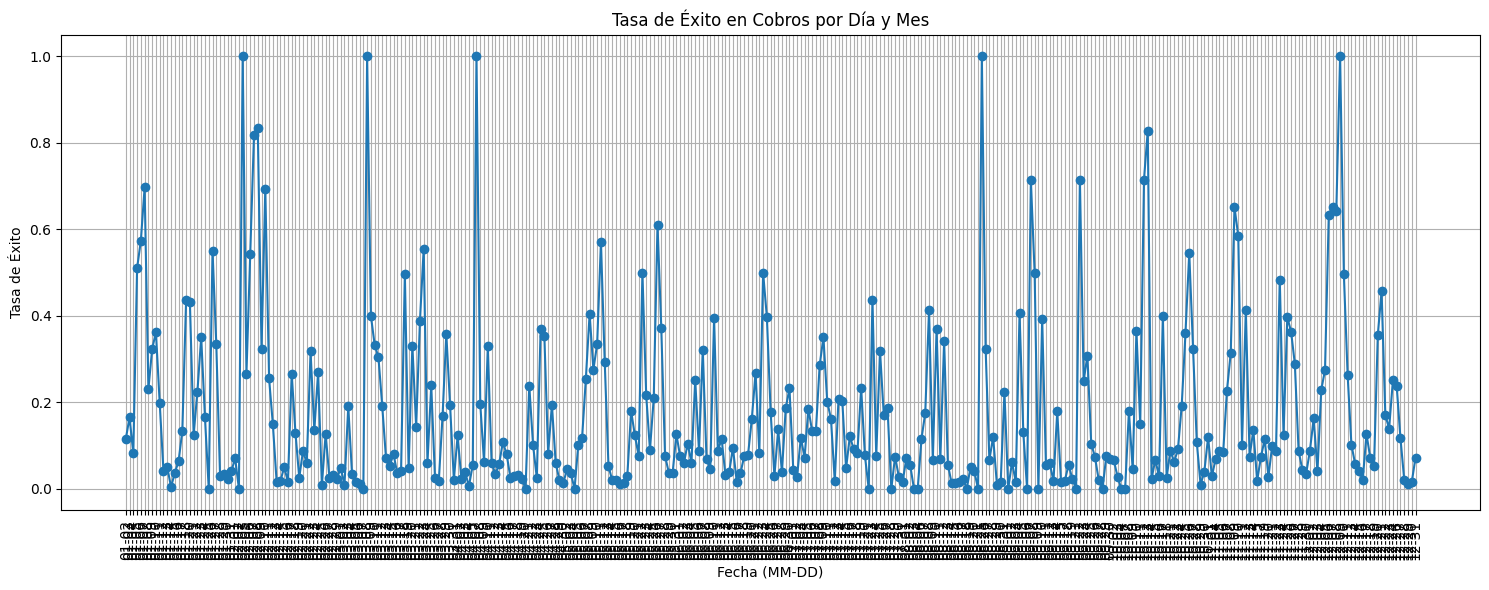

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Carga el archivo CSV
df = pd.read_csv('conteo_mes_dia.csv')

# Renombrar columnas
df.rename(columns={'0': 'exitosos', '4': 'fallidos'}, inplace=True)

# Calcular total intentos y tasa de éxito
df['total_intentos'] = df['exitosos'] + df['fallidos']
df['tasa_exito'] = df.apply(lambda row: row['exitosos'] / row['total_intentos'] if row['total_intentos'] > 0 else 0, axis=1)

# Crear etiqueta para eje X en formato MM-DD
df['fecha'] = df['mes'].astype(str).str.zfill(2) + '-' + df['dia'].astype(str).str.zfill(2)

# Ordenar por mes y día
df_sorted = df.sort_values(by=['mes', 'dia'])

# Graficar
plt.figure(figsize=(15,6))
plt.plot(df_sorted['fecha'], df_sorted['tasa_exito'], marker='o', linestyle='-')
plt.title('Tasa de Éxito en Cobros por Día y Mes')
plt.xlabel('Fecha (MM-DD)')
plt.ylabel('Tasa de Éxito')
plt.xticks(rotation=90)  # Girar etiquetas para mejor lectura
plt.grid(True)
plt.tight_layout()
plt.show()



In [24]:
# Contar cuántas veces aparece cada valor único en 'NomEmisora'
conteo_emisora = df_completo['NomEmisora'].value_counts()

# Contar para cada 'NomEmisora' cuántas veces aparece un 'IdRespuestaBanco' igual a 0
conteo_ceros = df_completo[df_completo['IdRespuestaBanco'] == 0].groupby('NomEmisora').size()

# Para juntar ambos conteos en un solo DataFrame y verlos juntos:
resultado = pd.DataFrame({
    'Total Apariciones': conteo_emisora,
    'Veces IdRespuestaBanco=0': conteo_ceros
}).fillna(0).astype(int)  # Completa con 0 donde no haya ceros y convierte a int

resultado


,Total Apariciones,Veces IdRespuestaBanco=0
NomEmisora,,
BANAMEX CLABE TRADICIONAL,654356,15839
BANAMEX CUENTA,63790,1734
BANAMEX INTERBANCARIO,1,0
BANAMEX TARJETA,17,0
BANAMEX TRADICIONAL REINTENTO,2230021,39254
BANORTE CLABE EN LINEA,19833,349
BANORTE CLABE INTERBANCARIO,20,6
BANORTE CLABE TRADICIONAL,228029,17380
BANORTE CUENTA EN LINEA,914,81
